In [9]:
%pwd # print woriking directory
%cd yolov5/
!pip install -r requirements.txt

C:\Users\AI\Auto_Farming\yolov5


In [10]:
%pwd

'C:\\Users\\AI\\Auto_Farming\\yolov5'

# 동영상에서 한 프레임을 이미지 파일로 저장하기

- <font color=red>cv2.imwrite(“파일명.확장자”, 프레임이미지, 옵션)</font>
  - params=[cv2.IMWRITE_PNG_COMPRESSION, 0]) : 압축 하지 않는 PNG, 세 번째 파라미터는 압축률로 0~9까지 설정 가능 (0은 압축 없음)

In [66]:
import os
import glob
import cv2
import time
import matplotlib.pyplot as plt

cap = cv2.VideoCapture(1)

while True :
    exp_path = "C:/Users/AI/Auto_Farming/yolov5/runs/detect/exp/"
    path = 'C:/Users/AI/Auto_Farming/yolov5/'
    weight = './runs/train/insam_yolov5s_results/weights/best.pt'
    source = 'C:/Users\AI/Auto_Farming/image/capture.png' 
    try:
        list1=glob.glob(exp_path+'crops/Ginseng/capture*')
        for i in list1:
            os.unlink(i)
        list2=glob.glob(exp_path+'crops/head/capture*')
        for i in list2:
            os.unlink(i)
        os.unlink(exp_path+"labels/capture.txt")
    except:
        print("")
    
    ret, frame = cap.read()
    if not ret :
        print("webcam is not connected")
        cap.release()
        cv2.destroyAllWindows()
        break
        
    key = cv2.waitKey(66)
    frame = frame[:,:480]
    cv2.imwrite(f'C:/Users\AI/Auto_Farming/image/capture.png', frame,
               params=[cv2.IMWRITE_PNG_COMPRESSION, 0])
    print(f'C:/Users\AI/Auto_Farming/image/capture.png 파일을 저장하였습니다.')

    rs = !python {path}detect3.py --weight {weight} --img 480 --source {source} --save-crop --save-txt --exist-ok --hide-conf --hide-labels
    
    for i in rs:
        print(i)

    cap.release()
    cv2.destroyAllWindows()
    break
    
#     if key ==51 : #숫자3을 누르면
#         print('camera capture release')
#         cap.release() #비디오 객체 메모리에서 해제
#         cv2.destroyAllWindows() #창닫기
#         break

C:/Users\AI/Auto_Farming/image/capture.png 파일을 저장하였습니다.
detect3: weights=['./runs/train/insam_yolov5s_results/weights/best.pt'], source=C:/Users\AI/Auto_Farming/image/capture.png, data=data\coco128.yaml, imgsz=[480, 480], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=True, line_thickness=3, hide_labels=True, hide_conf=True, half=False, dnn=False, vid_stride=1
YOLOv5  v6.2-219-ga83d2a5 Python-3.9.12 torch-1.12.1 CPU

Fusing layers... 
YOLOv5s summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 C:\Users\AI\Auto_Farming\image\capture.png: 480x480 7 Ginsengs, 5 heads, 111.7ms
Speed: 1.0ms pre-process, 111.7ms inference, 1.0ms NMS per image at shape (1, 3, 480, 480)
Results saved to runs\detect\exp
1 labels saved to runs\detect\exp\labels


In [67]:
rs[5]

'image 1/1 C:\\Users\\AI\\Auto_Farming\\image\\capture.png: 480x480 7 Ginsengs, 5 heads, 111.7ms'

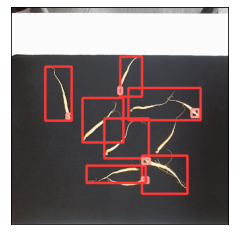

In [68]:
#디텍션 결과 이미지로
exp_path = "C:/Users/AI/Auto_Farming/yolov5/runs/detect/exp/"
img1 = cv2.imread(exp_path+'capture.png', cv2.IMREAD_COLOR)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.xticks([]); plt.yticks([])
plt.imshow(img1)

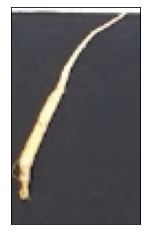

In [69]:
#인삼 디텍션된 것 크롭
ginseng_crop_path = "C:/Users/AI/Auto_Farming/yolov5/runs/detect/exp/crops/Ginseng/"
ginseng_crop_img = cv2.imread(ginseng_crop_path+'capture.jpg', cv2.IMREAD_COLOR)
ginseng_crop_img = cv2.cvtColor(ginseng_crop_img, cv2.COLOR_BGR2RGB)
plt.xticks([]); plt.yticks([])
plt.imshow(ginseng_crop_img)

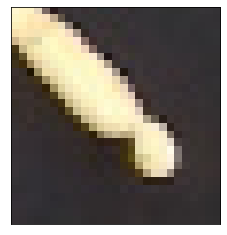

In [70]:
#뇌두 디텍션된 것 크롭
head_crop_path = "C:/Users/AI/Auto_Farming/yolov5/runs/detect/exp/crops/head/"
head_crop_img = cv2.imread(head_crop_path+"capture.jpg", cv2.IMREAD_COLOR)
head_crop_img = cv2.cvtColor(head_crop_img, cv2.COLOR_BGR2RGB)
plt.xticks([]); plt.yticks([])
plt.imshow(head_crop_img)

In [71]:
#좌표 save_txt
coordinate_path = "C:/Users/AI/Auto_Farming/yolov5/runs/detect/exp/labels/"
with open(coordinate_path+"capture.txt", "r") as f:
    txt = f.readlines()  # 해당 파일 줄별 리스트 형태로 반환
print(txt)

['0 240 111 288 199\n', '1 397 227 413 244\n', '1 236 179 244 193\n', '0 205 247 303 335\n', '0 288 329 388 413\n', '1 288 377 302 389\n', '0 166 351 296 389\n', '1 289 335 305 347\n', '1 122 237 133 251\n', '0 157 202 247 300\n', '0 258 180 417 251\n', '0 75 133 133 252\n']


In [72]:
# ginseng, head 좌표 따로 모으는 반복문
ginseng_coordinate = []
head_coordinate = []
for i in txt:
    if i[0] == '0':
        ginseng_coordinate.append(i)
    if i[0] == '1':
        head_coordinate.append(i)
print(ginseng_coordinate)
print(head_coordinate)

['0 240 111 288 199\n', '0 205 247 303 335\n', '0 288 329 388 413\n', '0 166 351 296 389\n', '0 157 202 247 300\n', '0 258 180 417 251\n', '0 75 133 133 252\n']
['1 397 227 413 244\n', '1 236 179 244 193\n', '1 288 377 302 389\n', '1 289 335 305 347\n', '1 122 237 133 251\n']


## ROI에 도형 그리기

- <font color=red>cv2.rectangle(배경이미지, 좌상단점좌표, 우하단점좌표, 색상, 선두께)</font> : 사각형 그리기
- <font color=red>cv2.circle(배경이미지, 중심좌표, 반지름, 색상, 선두께)</font> : 원 그리기

604.0
276.5


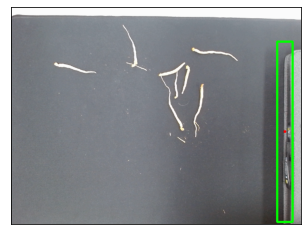

In [41]:
path12 = "C:/Users/AI/Auto_Farming/image/capture.png"
img12 = cv2.imread(path12, cv2.IMREAD_COLOR)
img12 = cv2.cvtColor(img12, cv2.COLOR_BGR2RGB)
img12 = cv2.rectangle(img12, (587, 78),(621, 475),(0,255,0), 3)

x13 = (587+621)/2
y13 = (78+475)/2
print(x13)
print(y13)
img13 = cv2.circle(img12, (int(x13), int(y13)),3,(255,0,0), -1)

plt.xticks([]); plt.yticks([])
plt.imshow(img12)

# 데이터 전처리

In [65]:
import cv2
webcam = cv2.VideoCapture(1)
if not webcam.isOpened():
    print("Could not open webcam")
    exit()
while webcam.isOpened():
    status, frame = webcam.read()
    frame = frame[:,:480]
    if status:
        cv2.imshow("test", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
webcam.release()
cv2.destroyAllWindows()

In [ ]:
#     # 원본 동영상 크기 정보
#     w = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
#     h = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
#     print("원본 동영상 너비(가로) : {}, 높이(세로) : {}".format(w, h))

#     # 동영상 크기 변환
#     cap.set(cv2.CAP_PROP_FRAME_WIDTH, 480) # 가로
#     cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480) # 세로

#     # 변환된 동영상 크기 정보
#     w = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
#     h = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
#     print("변환된 동영상 너비(가로) : {}, 높이(세로) : {}".format(w, h))

In [ ]:
    # 이미지 보정 시작 #
#     img = cv2.imread("C:/Users\AI/Auto_Farming/image/capture.png", cv2.IMREAD_COLOR)
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     plt.xticks([]); plt.yticks([])
#     plt.imshow(img)
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
#     lower = np.array([20, 100,200])
#     higher = np.array([30, 255, 255])
#     mask = cv2.inRange(hsv, lower, higher)
#     img_hsv = cv2.bitwise_and(img, img, mask=mask)
#     img_gray = cv2.cvtColor(img_hsv, cv2.COLOR_RGB2GRAY)
    # 이미지 보정 끝 #

In [ ]:
# os 라이브러리에 디렉터리 안에 있는 파일 명 리스트로 받는 함수 쓰고
# 거기서 정렬한다음에 
# 맨 뒤에꺼 하면 최신 파일 되니까
# 그거 로드하면 되긴할듯 

In [ ]:
# 갯수 =
# 좌표list = []
# 가장 앞쪽에 있는거 좌표 = []
# 가장 앞쪽에 있는거 좌표 로봇에 보내주고
# 갯수가 n개 이하되면 피서한테 튕기면서 당겨오라고 하고

In [ ]:
# 생육상태 파악 <딥러닝(상민)
# 외부인 침입 감지 <딥러닝(대철)
# 컨베이어벨트 작동 여부 확인 <딥러닝(?)
# 환기장치, 워터벨브 등 엑추에이터 작동여부 확인 <딥러닝(?)
# 챗봇상담 < 딥러닝(?)

In [ ]:
!python detect.py --weight ./runs/train/insam_yolov5s_results/weights/best.pt --source '{img}'